In [1]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer
from env import user, password, host
import env
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import csv
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import wrangle_zillow

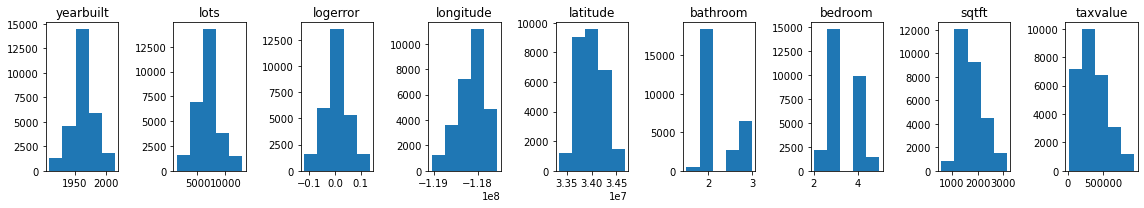

In [2]:
zillow_train, zillow_validate, zillow_test=wrangle_zillow.wrangle_zillow(1.5)

In [3]:
zillow_train

,yearbuilt,lots,logerror,longitude,latitude,bathroom,bedroom,fips,sqtft,zipcode,taxvalue,county,month
41701,1960.0,10200.0,0.087612,-117796820.0,33753930.0,3.0,4.0,6059.0,2470.0,97005.0,314807.0,"Orange County, CA",7
39118,1962.0,7438.0,0.006771,-117731035.0,34072658.0,2.0,3.0,6037.0,1554.0,96507.0,112433.0,"Los Angeles County, CA",7
35482,1951.0,4994.0,0.084270,-118349800.0,33867568.0,2.0,3.0,6037.0,1382.0,96162.0,557115.0,"Los Angeles County, CA",6
2638,1964.0,8403.0,0.030711,-118592813.0,34258968.0,2.0,4.0,6037.0,1681.0,96346.0,547000.0,"Los Angeles County, CA",1
51134,1954.0,7145.0,0.034812,-117911671.0,34110398.0,2.0,4.0,6037.0,1100.0,96464.0,58280.0,"Los Angeles County, CA",8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,1954.0,6768.0,-0.011103,-118461739.0,34184193.0,3.0,4.0,6037.0,1572.0,96420.0,313311.0,"Los Angeles County, CA",1
16791,1921.0,5601.0,-0.093980,-118321502.0,34079644.0,2.0,2.0,6037.0,1156.0,95985.0,74301.0,"Los Angeles County, CA",3
29998,1955.0,10278.0,0.040103,-117856948.0,34140323.0,2.0,3.0,6037.0,1286.0,96486.0,162155.0,"Los Angeles County, CA",5
49000,1947.0,6048.0,0.022207,-118125113.0,33819600.0,2.0,4.0,6037.0,1556.0,96242.0,407255.0,"Los Angeles County, CA",8


In [4]:
def bedroom_w_county():
    fig, ax = plt.subplots(figsize = (7,5))
    sns.scatterplot(data=zillow_train,x=zillow_train['longitude'],
                y=zillow_train['latitude'], zorder=1,hue='bedroom')

In [5]:
def l_county():
    fig, ax = plt.subplots(figsize = (7,5))
    sns.scatterplot(data=zillow_train,x=zillow_train['longitude'],
                y=zillow_train['latitude'], zorder=1,hue='county')

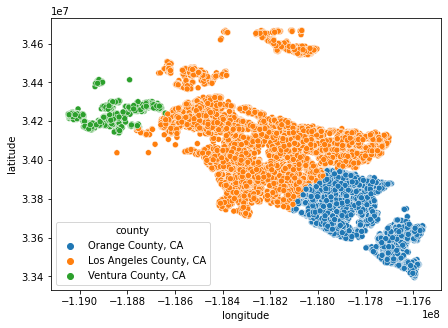

In [6]:
l_county()

In [7]:
zillow_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15744 entries, 41701 to 14740
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   yearbuilt  15744 non-null  float64
 1   lots       15744 non-null  float64
 2   logerror   15744 non-null  float64
 3   longitude  15744 non-null  float64
 4   latitude   15744 non-null  float64
 5   bathroom   15744 non-null  float64
 6   bedroom    15744 non-null  float64
 7   fips       15744 non-null  object 
 8   sqtft      15744 non-null  float64
 9   zipcode    15744 non-null  object 
 10  taxvalue   15744 non-null  float64
 11  county     15744 non-null  object 
 12  month      15744 non-null  int64  
dtypes: float64(9), int64(1), object(3)
memory usage: 1.7+ MB


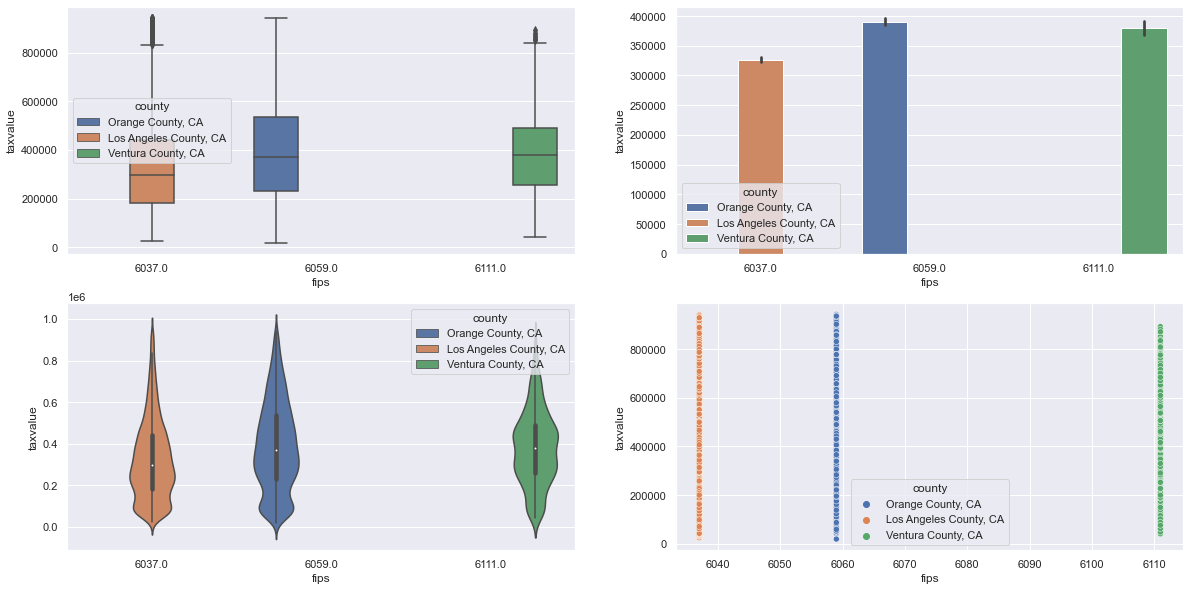

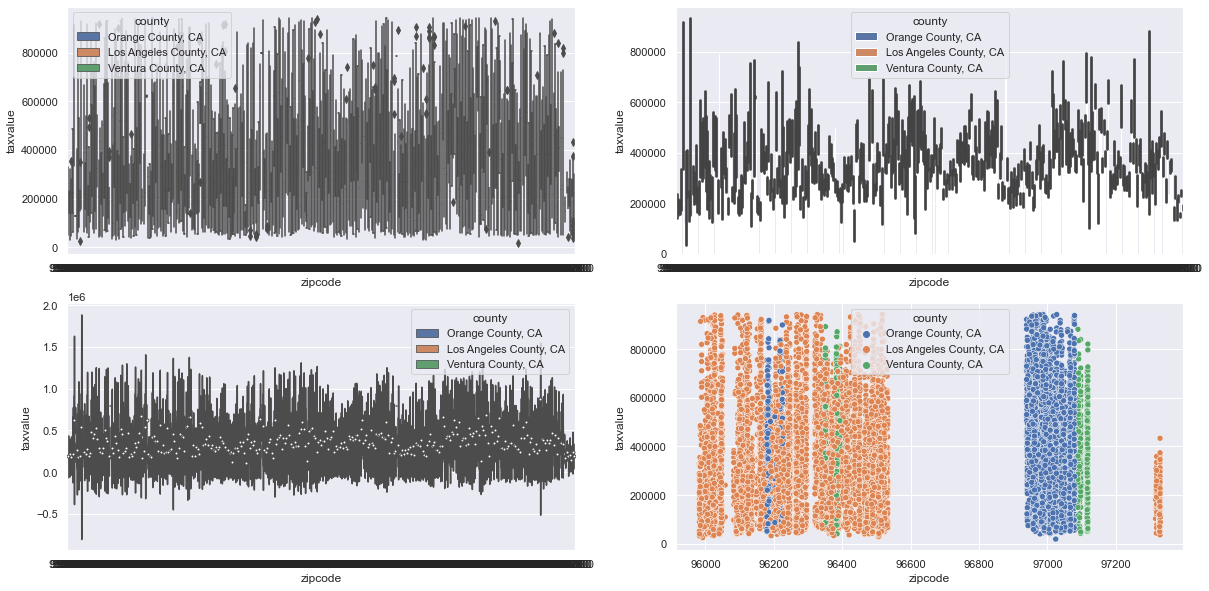

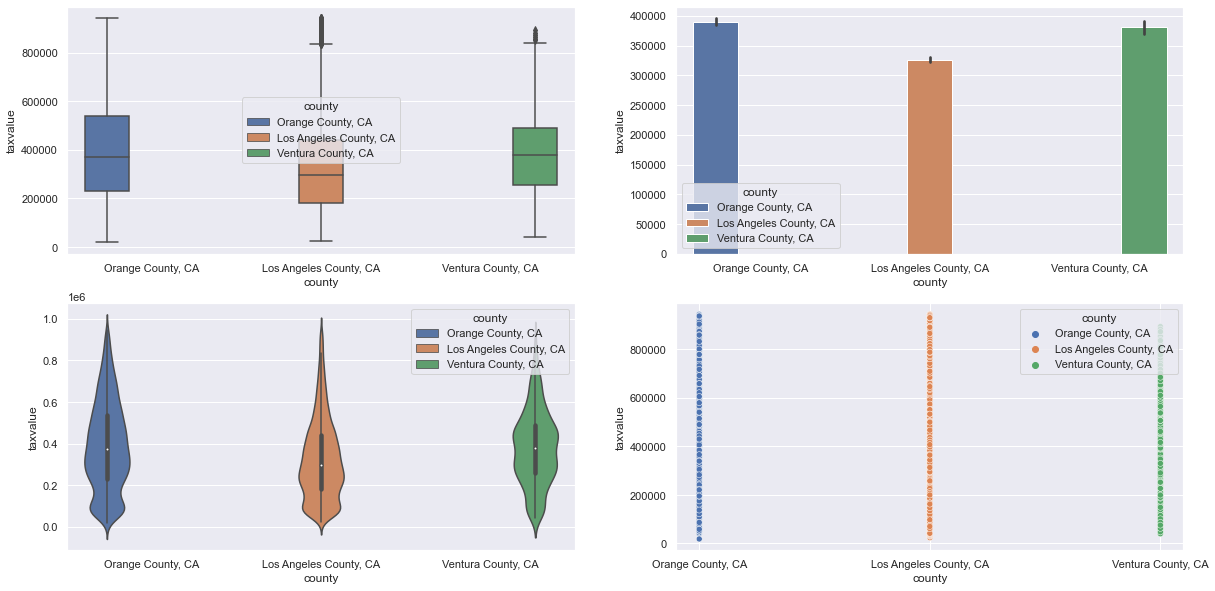

In [8]:
def plot_categorical_and_continuous_vars():
    columns = zillow_train.select_dtypes('object')
    for col in columns:
        sns.set(rc={'figure.figsize':(20,10)})
        fig, axes = plt.subplots(2,2)
        sns.boxplot(x= col, y="taxvalue", data=zillow_train, hue = 'county', ax = axes[0,0])
        sns.barplot(x= col, y="taxvalue", data=zillow_train, hue = 'county', ax = axes[0,1])
        sns.violinplot(x= col, y="taxvalue", data=zillow_train, hue = 'county', ax = axes[1,0])
        sns.scatterplot(x= col, y="taxvalue", data=zillow_train, hue = 'county', ax = axes[1,1])
plot_categorical_and_continuous_vars()

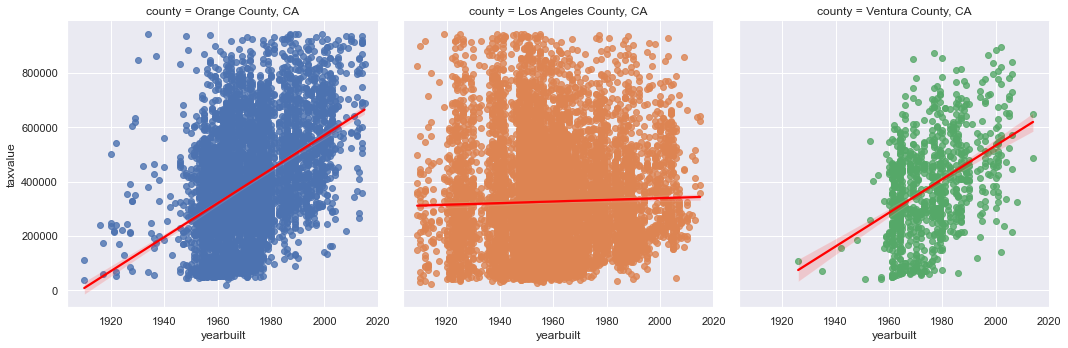

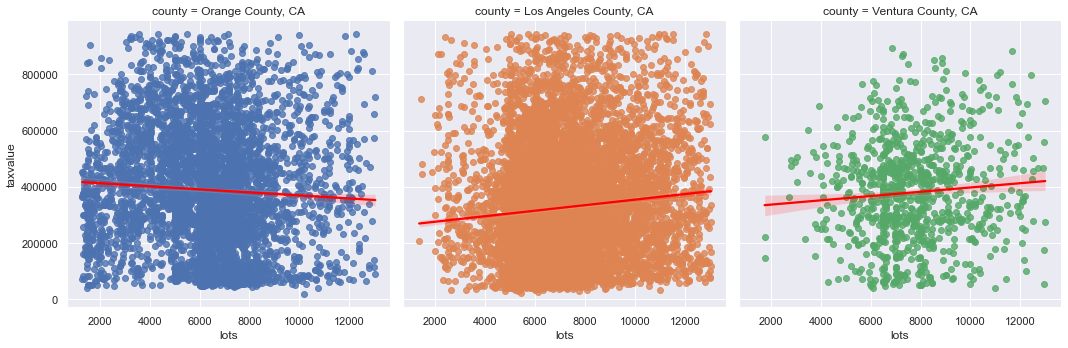

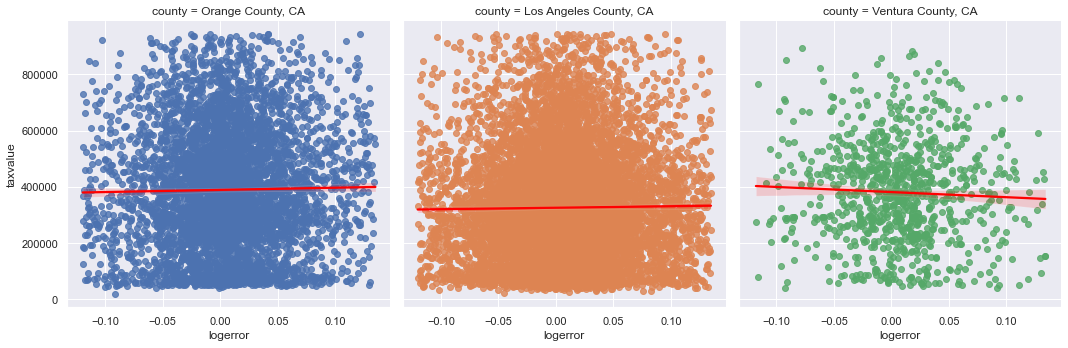

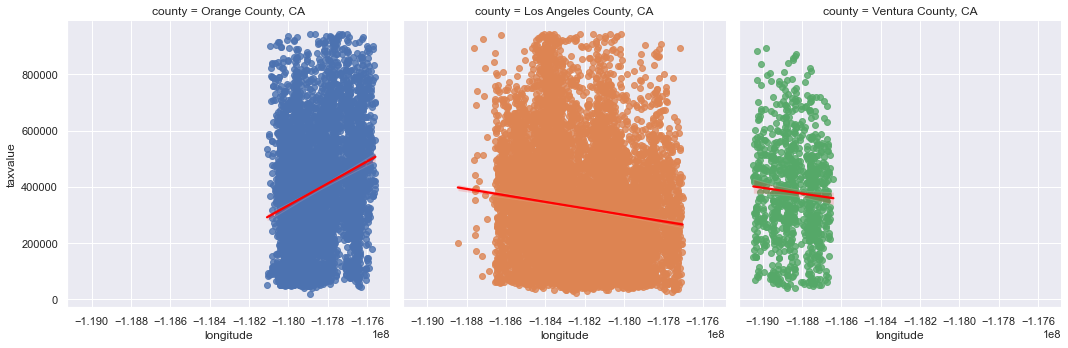

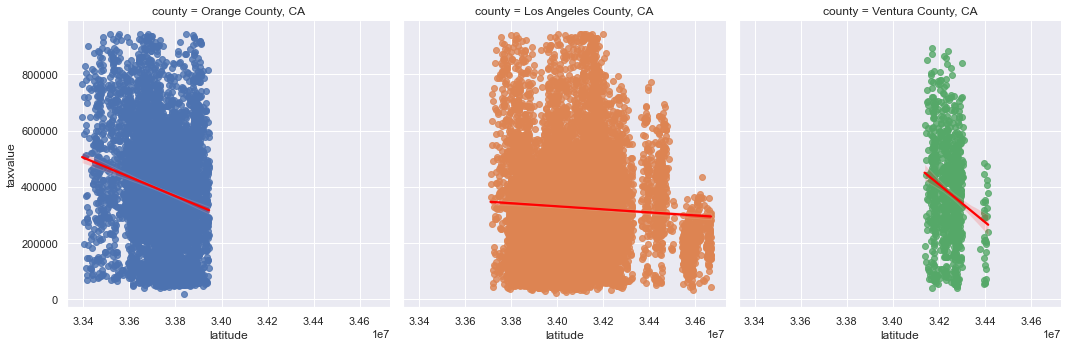

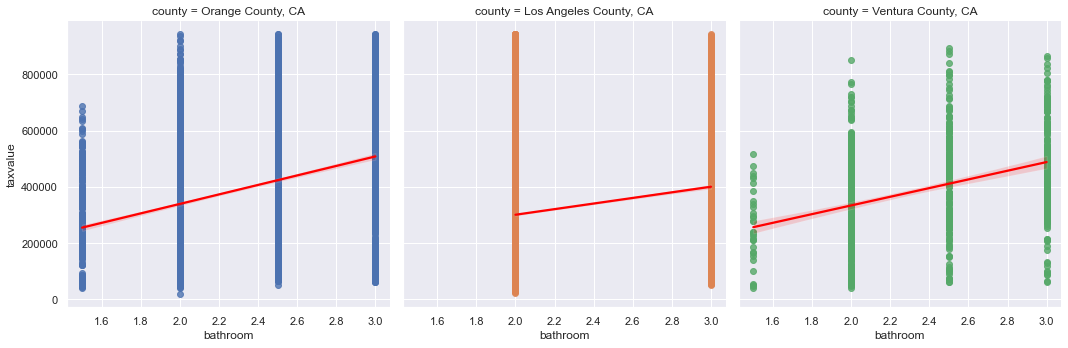

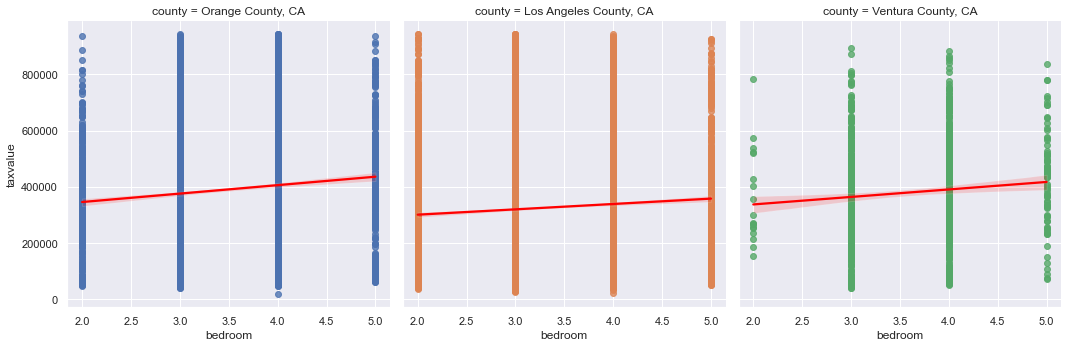

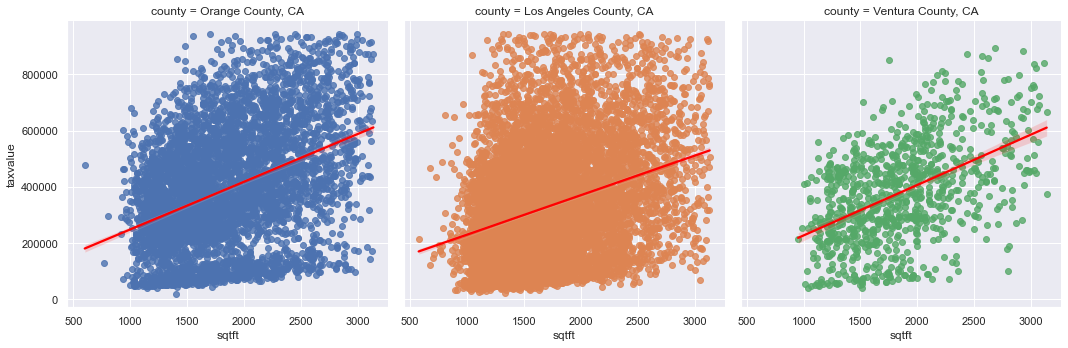

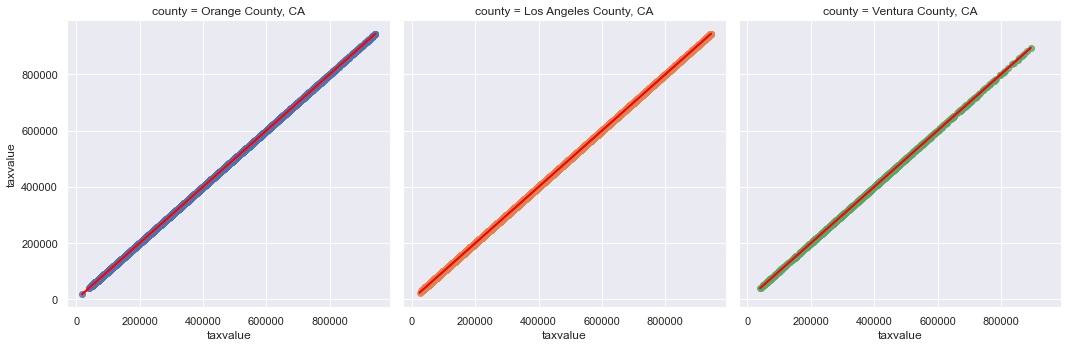

In [9]:
def plot_variable_pairs():
    columns = zillow_train.select_dtypes('float')
    for col in columns:
        sns.lmplot(x= col, y="taxvalue", data=zillow_train, col = 'county', hue = 'county', line_kws={'color': 'red'})
plot_variable_pairs()

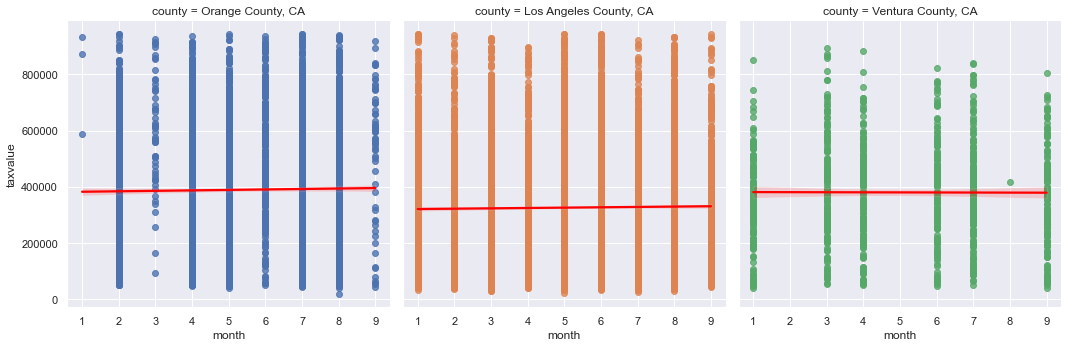

In [10]:
sns.lmplot(x= 'month', y="taxvalue", data=zillow_train, col = 'county', hue = 'county', line_kws={'color': 'red'})


In [11]:
def tax_per_month():
    sns.kdeplot(zillow_train.bedroom[(zillow_train["taxvalue"]<1000000)],
                color="#0072BD", shade = True)

### Question 1
Whether the counties have significant different on the bedroom count

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

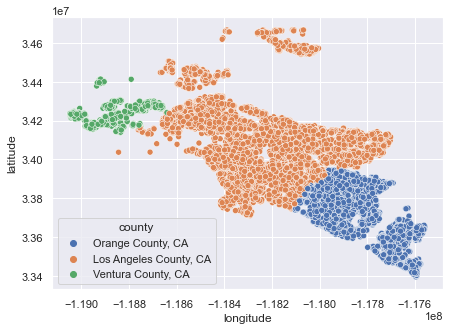

In [12]:
# the explore.py has created a visulized information. 
# The functions are l_county and bedroom_w_county. This is what we are going to use for this explore
fig, ax = plt.subplots(figsize = (7,5))
sns.scatterplot(data=zillow_train,x=zillow_train['longitude'],
            y=zillow_train['latitude'], zorder=1,hue='county')

## Key Takeaway
- The bedroom has no significant different spread out each county. Which denied the initial assumption that the bedroom plays significant role with county taxvalue.
- However, we do find out that Los Angeles County is significant larger than the other two counties, which validated the reason why Los Angeles county has more transaction than other two counties.

### Question 2
- Whether the month is impacting the taxvalue?

In [13]:
def differentrate(zillow_train):
   ax=sns.displot(
    data=zillow_train,
    x="month", hue="county",
    kind="kde", height=6,
    multiple="fill", clip=(0, None),
    palette="ch:rot=-.25,hue=1,light=.75",
).set(title='County transaction rate',ylabel='transaction')

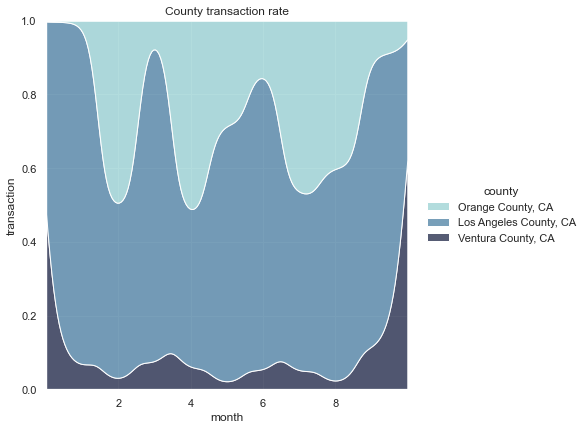

In [14]:
differentrate(zillow_train)

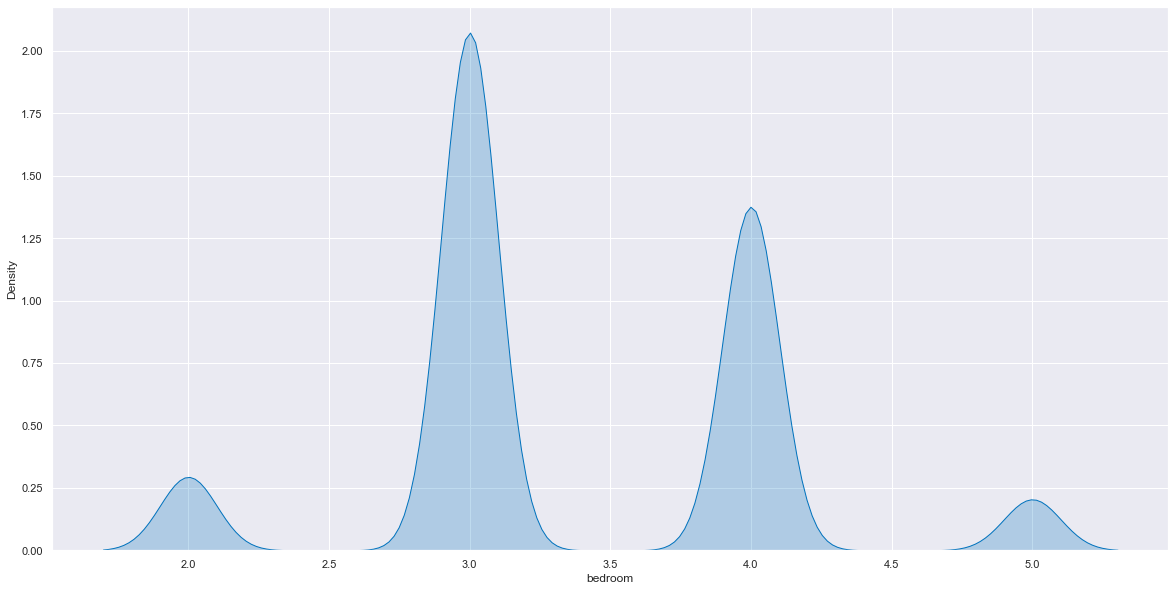

In [15]:
tax_per_month()

## Key Takeaway
- In Januaray, Los Angeles and orange county are the highest transaction volume, but the tax value was low
- The similar scenario happened in the September
- The highest tax value is in May as the graph depicted, and which the orange county was involved with the transaction
- The orange county has the highest tax value, which presumed to have the most impact on the tax value

### Question 3
- Hypothesis that if there are relationship between the month and orange county

#### Hypothesis
- HO=Mean of taxvalue of the orange county <= Mean of taxvalue of other counties
- H1=Mean of taxvalue of the orange county => Mean of taxvalue of other counties
- Alpha =0.05

In [16]:
orange = zillow_train[zillow_train.county == 'Orange County, CA'].taxvalue
other = zillow_train[zillow_train.county != 'Orange County, CA'].taxvalue

In [17]:
orange.var(),other.var()

(45466909827.9464, 37350892433.878975)

In [18]:
from scipy import stats
t, p = stats.ttest_ind(orange, other, equal_var=False)

In [19]:
if p/2 < 0.05:
    print("Orange County's tax value is $",round(orange.mean()-other.mean(),2),"higher than overall counties")
elif t < 0:
    print("Orange County's tax value is $",orange.mean()-other_mean(),"higher than overall counties")
else:
    print("Orange County's tax value is same as all overall counties")

Orange County's tax value is $ 58958.75 higher than overall counties


## Key Takeaway
- The orange county is significant higher tax value than other counties by $58958
- The people who have transaction in orange county might expected to pay higher tax rate than other counties
- Therefore we reject the hypothesis statement
- The next step should further examined whether the bedroom or other counts in orange county caused this situation. or is it because the tax rate in orange county

### Question 4
- Hypothesis that whether the bedroom count determine the tax value?

#### Hypothesis
- HO=Bedroom count is not determining the tax value
- H1=Bedroom count is determining the tax value
- Alpha =0.05

In [20]:
# find the number of obeservation and alpha
n = zillow_train.shape[0] 
α = 0.05

x = zillow_train.bedroom
y = zillow_train.taxvalue
corr, p = stats.pearsonr(x, y)
corr,p

(0.09470134416253975, 1.0689926443829656e-32)

In [21]:
if p < α:
    print('The bedroom count is determine the tax value')
else:
    print('The bedroom count is not determine the tax value')

The bedroom count is determine the tax value


## Key takeaway
- The bedroom is determining the tax value
- It is not a strong correlation determined by the hypothesis test
- The next step for us should be examining other counts to determine whether their correlation is strong

## Exploration Key Takeaway
- The bedroom is correlated to the tax value
- The orange county is paying higher tax value compared to the other counties
- The January and September are two most active transaction time for Los Angeles County and Ventura County
- The next steps should we further examine the other correaltions
- The past record should also be obtained to predict the tax rate for each counties

<AxesSubplot:xlabel='month', ylabel='logerror'>

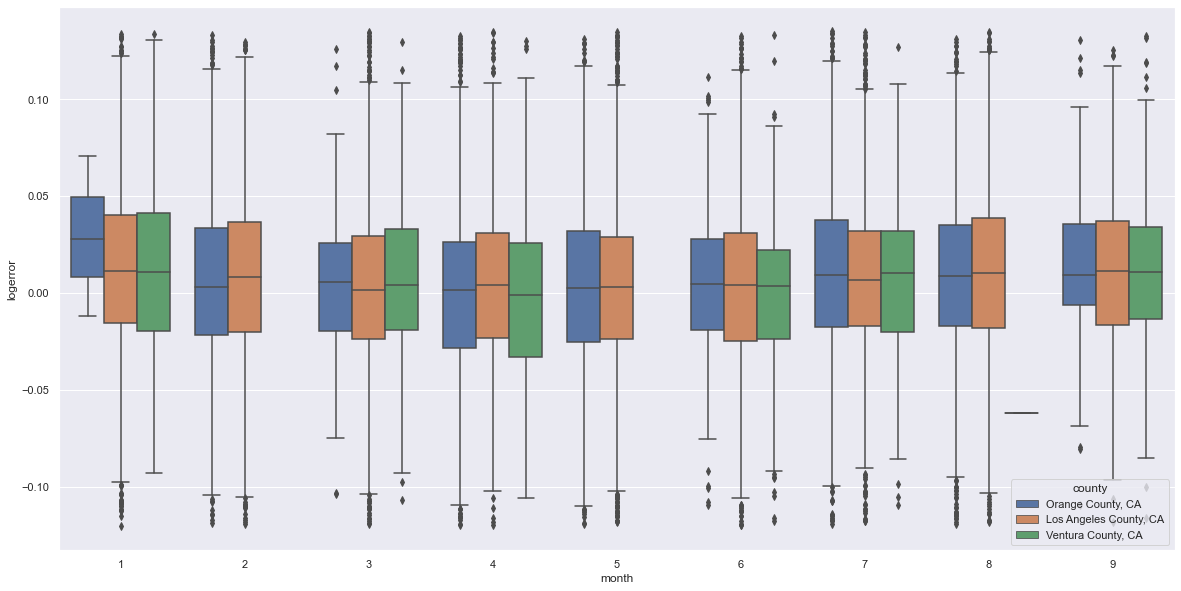

In [24]:
 sns.boxplot(x= 'month', y="logerror", data=zillow_train, hue = 'county')

In [ ]:
sns.violinplot(x= col, y="taxvalue", data=zillow_train, hue = 'county', ax = axes[1,0])